In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from modules.cleaner import Cleaner

In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
files_to_load = glob.glob('../data/*.txt')
cleaner = Cleaner()

dvf_raw = cleaner.load(files_to_load)

cleaner.clean()

/workspaces/big-data/src/modules/cleaner.py:10: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.concat([pd.read_csv(file, sep='|', decimal=',', usecols=self.COLS) for file in files])
/workspaces/big-data/src/modules/cleaner.py:10: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.concat([pd.read_csv(file, sep='|', decimal=',', usecols=self.COLS) for file in files])


In [14]:
dvf_raw['Nature mutation'] = dvf_raw['Nature mutation'].astype('category')

Index(['Adjudication', 'Echange', 'Expropriation', 'Vente',
       'Vente en l'état futur d'achèvement', 'Vente terrain à bâtir'],
      dtype='object')

In [16]:
dvf_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8453094 entries, 0 to 4649208
Data columns (total 43 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   Identifiant de document     float64 
 1   Reference document          float64 
 2   1 Articles CGI              float64 
 3   2 Articles CGI              float64 
 4   3 Articles CGI              float64 
 5   4 Articles CGI              float64 
 6   5 Articles CGI              float64 
 7   No disposition              int64   
 8   Date mutation               object  
 9   Nature mutation             category
 10  Valeur fonciere             object  
 11  No voie                     float64 
 12  B/T/Q                       object  
 13  Type de voie                object  
 14  Code voie                   object  
 15  Voie                        object  
 16  Code postal                 float64 
 17  Commune                     object  
 18  Code departement            object  
 19  Code 

<Axes: xlabel='Nature mutation'>

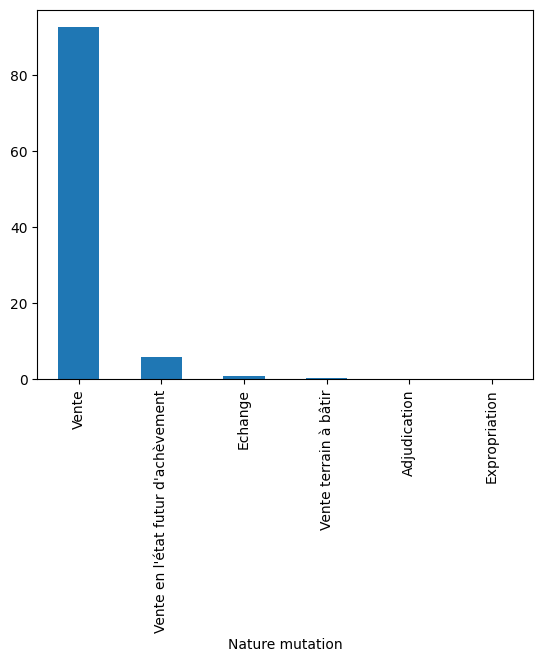

In [24]:
dvf_raw['Nature mutation'].value_counts(normalize=True).mul(100).plot(kind='bar')

<Axes: >

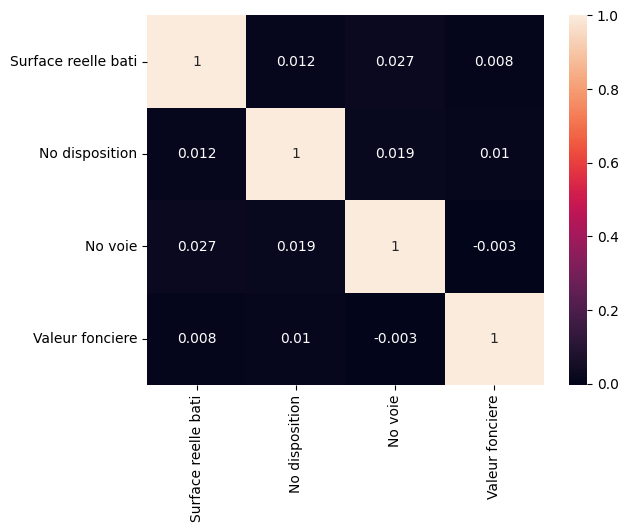

In [39]:
heatmap = dvf_raw[['Surface reelle bati', 'No disposition', 'No voie', 'Valeur fonciere']].corr().round(3)
sns.heatmap(data=heatmap, annot=True)

In [36]:
dvf_raw.isnull().sum()
dvf_raw.dropna(subset=['Valeur fonciere'], inplace=True)

In [38]:
dvf_raw['Valeur fonciere'] = dvf_raw['Valeur fonciere'].astype('float64')
dvf_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8386146 entries, 0 to 4649208
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             float64
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune              

In [47]:
def updateCode(code: object):
    return str.zfill("{0}".format(code), 2)

dvf_raw['Code 555'] = dvf_raw['Code departement'].apply(updateCode)